<a href="https://colab.research.google.com/github/Gilgamesh60/Binding_affinity_predictor/blob/main/visualize_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

I have run the model on my training and test datasets. In this notebook, I am trying to evaluate my model's performance.

In [1]:
import pandas as pd
df_train = pd.read_csv("/content/results_train.csv")
df_test = pd.read_csv("/content/results_test.csv")

In [3]:
df_train

,Complex,real,predicted
0,3tt0,9.05,8.680250
1,3vbq,9.33,8.364920
2,2wa4,4.74,3.536353
3,4cc7,4.33,4.772016
4,4ln2,3.61,4.237852
...,...,...,...
3273,4p4s,4.94,5.929177
3274,2mkr,6.27,5.097188
3275,4j3u,6.34,5.676422
3276,3r22,7.77,7.178575


In [4]:
df_test

,Complex,real,predicted
0,1sqa,9.21,7.250219
1,2al5,8.40,6.949807
2,4j21,7.41,7.344808
3,3myg,10.70,7.662504
4,3f3c,6.02,6.256360
...,...,...,...
907,3gc4,7.60,7.526141
908,2v88,4.09,4.462253
909,1olu,4.41,4.739512
910,4n7m,5.47,4.652147


In [5]:
import matplotlib.pyplot as plt
import numpy as np
def plotGraph(y_test,y_pred,data_type):
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(data_type)
    plt.show()
    return

Let's check the model's performance on training and test datasets.

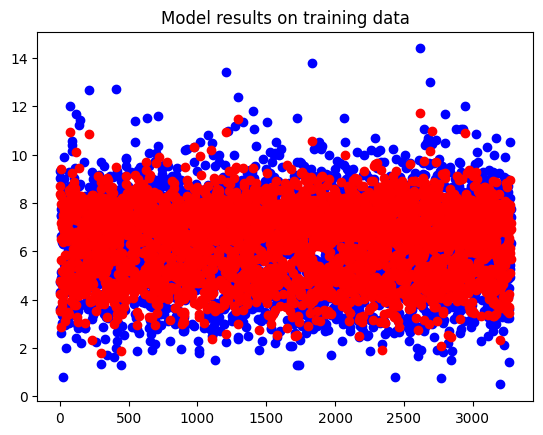

In [18]:
plotGraph(df_train['real'],df_train['predicted'],"Model results on training data")

As you can see for the protein-ligand complexes with -log(Ki/Kd) between 3 to 9 the model predictions are pretty spot on.  

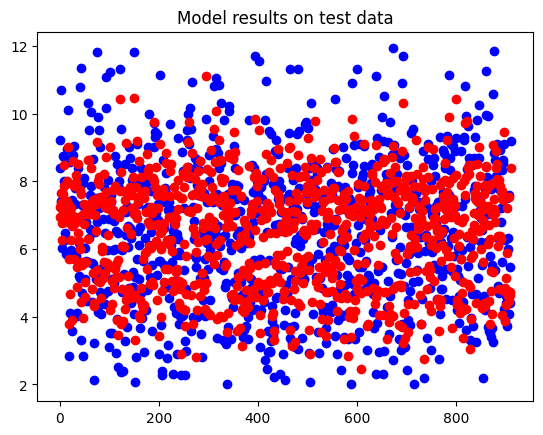

In [19]:
plotGraph(df_test['real'],df_test['predicted'],"Model results on test data")

And it also fits significantly well on the test dataset!

# Protein-ligand complex classification based on affinity


Most of the times, in case of a protein-ligand complex,we are not really interested in the value of binding affinty. We just want to accurately differentiate  between weak binders and strong binders. So I want to check how well our model performs in that aspect.

As mentioned in [this](https://pubs.acs.org/doi/pdf/10.1021/acs.jcim.0c01306) paper we are measuring binding affinity as -log(ki/kd). Protein−ligand complexes with −log(ki
/kd) > 7 can be labeled
as strong binders, and the ones with −log(ki
/kd) < 7 as weak binders.

In [2]:
def label(x):
  if x<7:
    return 'weak'
  else:
    return 'strong'

df_test['real']  = df_test['real'].apply(lambda x: label(x))
df_test['predicted']  = df_test['predicted'].apply(lambda x: label(x))
df_test

,Complex,real,predicted
0,1sqa,strong,strong
1,2al5,strong,weak
2,4j21,strong,strong
3,3myg,strong,strong
4,3f3c,weak,weak
...,...,...,...
907,3gc4,strong,strong
908,2v88,weak,weak
909,1olu,weak,weak
910,4n7m,weak,weak


In [7]:
#let's see the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_test['real'] = label_encoder.fit_transform(df_test['real'])
df_test['predicted'] = label_encoder.fit_transform(df_test['predicted'])
df_test

,Complex,real,predicted
0,1sqa,0,0
1,2al5,0,1
2,4j21,0,0
3,3myg,0,0
4,3f3c,1,1
...,...,...,...
907,3gc4,0,0
908,2v88,1,1
909,1olu,1,1
910,4n7m,1,1


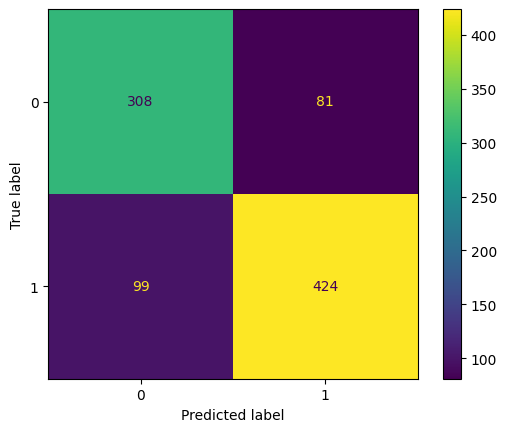

In [26]:
cm = confusion_matrix(df_test['real'], df_test['predicted'],labels = [0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [28]:
#Area under ROC AUC curve is also a good metric to check our model performance
from sklearn.metrics import roc_auc_score
score = roc_auc_score(df_test['real'],df_test['predicted'])
print(f'ROC-AUC score for our model is {score}')

ROC-AUC score for our model is 0.801240617949638


As you can see the ROC-AUC score of our model is 0.80 which is pretty decent.